# Bank Credit Scoring Project
# 4 Appendix - 1. Explore Data
###http://www.kaggle.com/c/GiveMeSomeCredit

###김병건
###윤희경
###조유현

#0. Load Data

#I. One Feature: Histogram
    Individual feature distribution
    
#II. Two Features: Scatter Plot & Separated Histograms
    * Scatter Plot: 
        Input feature - Target feature (SeriousDlqin2yrs) relationships
    
    * Separated Histograms:
        - Individual feature distribution when SeriousDlqin2yrs == 1
        - Individual feature distribution when SeriousDlqin2yrs == 0

#0. Load Data

In [2]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#import data
data = pd.DataFrame.from_csv('cs-training.csv', encoding = 'utf-8')
print
print 'columns are', data.columns
print 
print 'data shape is', data.shape
print
data.head(30)


columns are Index([u'SeriousDlqin2yrs', u'RevolvingUtilizationOfUnsecuredLines', u'age', u'NumberOfTime30-59DaysPastDueNotWorse', u'DebtRatio', u'MonthlyIncome', u'NumberOfOpenCreditLinesAndLoans', u'NumberOfTimes90DaysLate', u'NumberRealEstateLoansOrLines', u'NumberOfTime60-89DaysPastDueNotWorse', u'NumberOfDependents'], dtype='object')

data shape is (150000, 11)



,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684,9,0,4,0,2


#I. One Feature: Histograms
    Individual feature distribution

##1. SeriousDlqin2yrs 
    Person experienced 90 days past due delinquency or worse 

In [4]:
SeriousDlqin2yrs = data['SeriousDlqin2yrs']
print SeriousDlqin2yrs.head(10)

1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: SeriousDlqin2yrs, dtype: int64


In [5]:
xData = np.sort(SeriousDlqin2yrs.unique())
print 'unique values are', xData
yData = np.bincount(SeriousDlqin2yrs)
print 'count are [0 1] = ', yData

unique values are [0 1]
count are [0 1] =  [139974  10026]


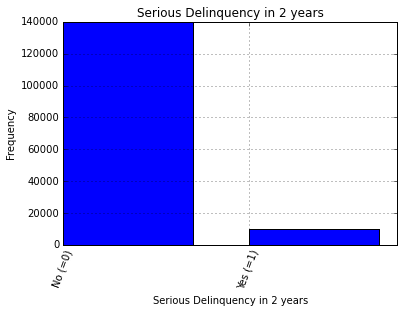

In [6]:
plt.bar(xData, yData, 0.70)
plt.xticks(xData, ('No (=0)', 'Yes (=1)'))
plt.xticks(rotation=70)
plt.xlabel("Serious Delinquency in 2 years")
plt.ylabel("Frequency")
plt.title("Serious Delinquency in 2 years")
plt.grid()

##2. RevolvingUtilizationOfUnsecuredLines
    Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits

In [7]:
# examine column by column
# 2. RevolvingUtilizationOfUnsecuredLines
RevolvingUtilizationOfUnsecuredLines = data['RevolvingUtilizationOfUnsecuredLines']
print RevolvingUtilizationOfUnsecuredLines.head(10)
print type(RevolvingUtilizationOfUnsecuredLines)

1     0.766127
2     0.957151
3     0.658180
4     0.233810
5     0.907239
6     0.213179
7     0.305682
8     0.754464
9     0.116951
10    0.189169
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64
<class 'pandas.core.series.Series'>


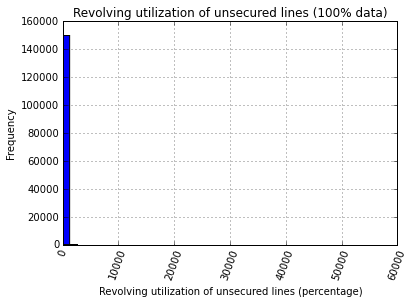

In [8]:
plt.hist(np.array(RevolvingUtilizationOfUnsecuredLines),40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Revolving utilization of unsecured lines (percentage)")
plt.ylabel("Frequency")
plt.title("Revolving utilization of unsecured lines (100% data)")
plt.grid()


Since outliers make it difficult to interpret the graph, we need to get rid of the outliers.


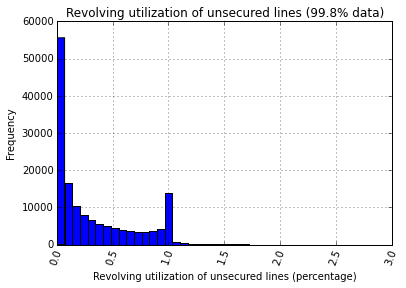

In [9]:
## Remove outliers
# sort the data
Revolving_sorted = np.sort(np.array(RevolvingUtilizationOfUnsecuredLines))

# 0.2 percent of the data are ignored -> only 99.8 percent data will be plotted
percentile_99_8 = Revolving_sorted.size * 0.002
plt.hist(Revolving_sorted[:-percentile_99_8], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Revolving utilization of unsecured lines (percentage)")
plt.ylabel("Frequency")
plt.title("Revolving utilization of unsecured lines (99.8% data)")
plt.grid()

##3. Age
    Age of borrower in years

In [10]:
age = data['age']
print age.head(10)

1     45
2     40
3     38
4     30
5     49
6     74
7     57
8     39
9     27
10    57
Name: age, dtype: int64


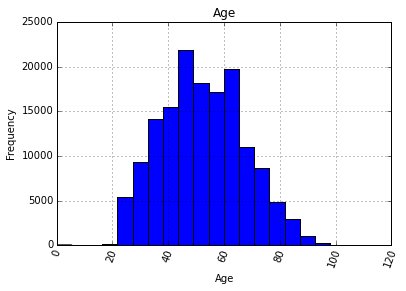

In [11]:
plt.hist(np.array(age),20)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age")
plt.grid()

##4. NumberOfTime30-59DaysPastDueNotWorse
    Number of times borrower has been 30-59 days past due but no worse in the last 2 years.

In [12]:
NumberOfTime30_59DaysPastDueNotWorse = data['NumberOfTime30-59DaysPastDueNotWorse']
print NumberOfTime30_59DaysPastDueNotWorse.head(10)

1     2
2     0
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    0
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


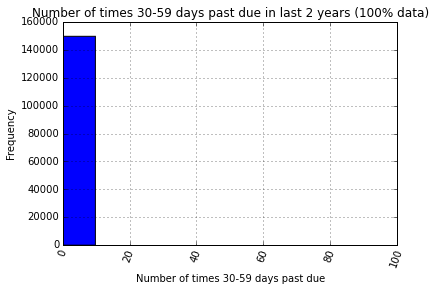

In [13]:
plt.hist(np.array(NumberOfTime30_59DaysPastDueNotWorse))
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Number of times 30-59 days past due")
plt.ylabel("Frequency")
plt.title("Number of times 30-59 days past due in last 2 years (100% data)")
plt.grid()

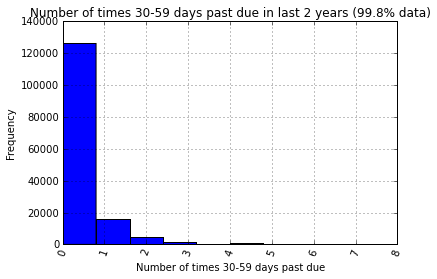

In [14]:
## Remove outliers
# sort the data
NumberOfTime30_59DaysPastDue_sorted = np.sort(np.array(NumberOfTime30_59DaysPastDueNotWorse))

# 0.2 percent of the data are ignored -> only 99.8 percent data will be plotted
percentile_99_8 = NumberOfTime30_59DaysPastDue_sorted.size * 0.002
plt.hist(NumberOfTime30_59DaysPastDue_sorted[:-percentile_99_8])
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Number of times 30-59 days past due")
plt.ylabel("Frequency")
plt.title("Number of times 30-59 days past due in last 2 years (99.8% data)")
plt.grid()

##5. DebtRatio

In [15]:
DebtRatio = data['DebtRatio']
print DebtRatio.head(10)

1        0.802982
2        0.121876
3        0.085113
4        0.036050
5        0.024926
6        0.375607
7     5710.000000
8        0.209940
9       46.000000
10       0.606291
Name: DebtRatio, dtype: float64


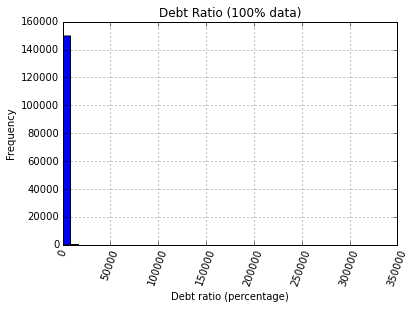

In [16]:
plt.hist(np.array(DebtRatio),40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (100% data)")
plt.grid()

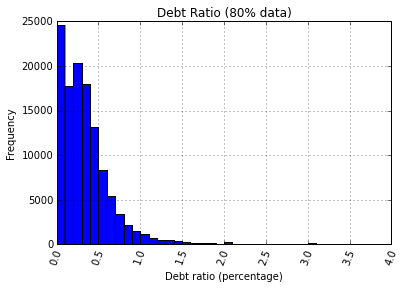

In [17]:
## Remove outliers
# sort the data
DebtRatio_sorted = np.sort(np.array(DebtRatio))

# 20 percent of the data are ignored -> only 80 percent data will be plotted
percentile_80 = DebtRatio_sorted.size * 0.2
plt.hist(DebtRatio_sorted[:-percentile_80], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (80% data)")
plt.grid()

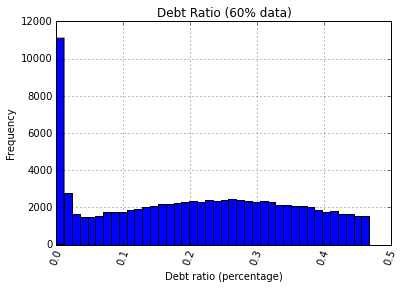

In [18]:
# 40 percent of the data are ignored -> only 60 percent data will be plotted
percentile_60 = DebtRatio_sorted.size * 0.4
plt.hist(DebtRatio_sorted[:-percentile_60], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("Debt ratio (percentage)")
plt.ylabel("Frequency")
plt.title("Debt Ratio (60% data)")
plt.grid()

##6.MonthlyIncome

In [19]:
# examine column by column
# 2. RevolvingUtilizationOfUnsecuredLines
MonthlyIncome = data['MonthlyIncome']
print MonthlyIncome.head(10)

MonthlyIncome_without_NaN = MonthlyIncome[MonthlyIncome > 0]
print type(MonthlyIncome_without_NaN)


1      9120
2      2600
3      3042
4      3300
5     63588
6      3500
7       NaN
8      3500
9       NaN
10    23684
Name: MonthlyIncome, dtype: float64
<class 'pandas.core.series.Series'>


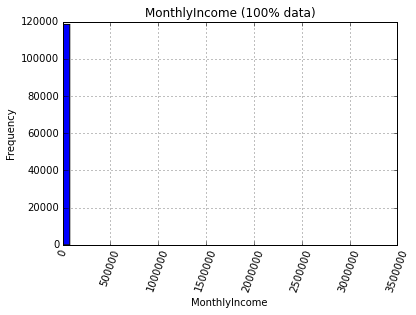

In [20]:
plt.hist(np.array(MonthlyIncome_without_NaN), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.title("MonthlyIncome (100% data)")
plt.grid()


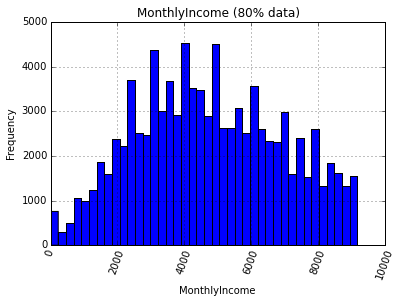

In [21]:
## Remove outliers
# sort the data
MonthlyIncome_sorted = np.sort(np.array(MonthlyIncome_without_NaN))

# 20 percent of the data are ignored -> only 80 percent data will be plotted
percentile_80 = MonthlyIncome_sorted.size * 0.2
plt.hist(MonthlyIncome_sorted[:-percentile_80], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.title("MonthlyIncome (80% data)")
plt.grid()

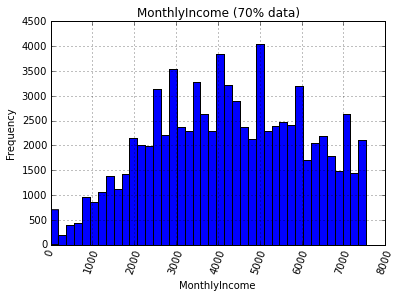

In [22]:
# 30 percent of the data are ignored -> only 70 percent data will be plotted
percentile_70 = MonthlyIncome_sorted.size * 0.3
plt.hist(MonthlyIncome_sorted[:-percentile_70], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("MonthlyIncome")
plt.ylabel("Frequency")
plt.title("MonthlyIncome (70% data)")
plt.grid()

##7.NumberOfOpenCreditLinesAndLoans

In [23]:
NumberOfOpenCreditLinesAndLoans = data['NumberOfOpenCreditLinesAndLoans']
print NumberOfOpenCreditLinesAndLoans.head(10)

print type(NumberOfOpenCreditLinesAndLoans)


1     13
2      4
3      2
4      5
5      7
6      3
7      8
8      8
9      2
10     9
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64
<class 'pandas.core.series.Series'>


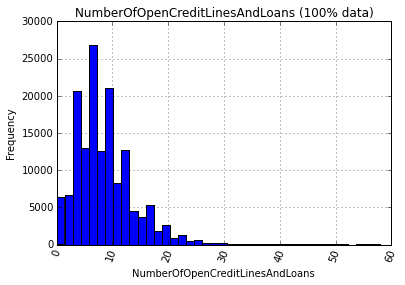

In [24]:
plt.hist(np.array(NumberOfOpenCreditLinesAndLoans), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfOpenCreditLinesAndLoans")
plt.ylabel("Frequency")
plt.title("NumberOfOpenCreditLinesAndLoans (100% data)")
plt.grid()


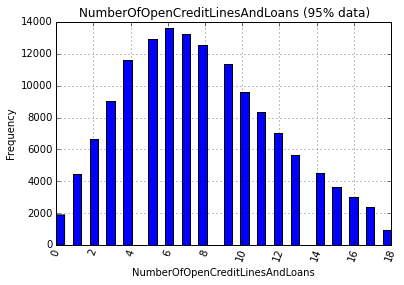

In [25]:
## Remove outliers
# sort the data
NumberOfOpenCreditLinesAndLoans_sorted = np.sort(np.array(NumberOfOpenCreditLinesAndLoans))

# 5 percent of the data are ignored -> only 95 percent data will be plotted
percentile_95 = NumberOfOpenCreditLinesAndLoans_sorted.size * 0.05
plt.hist(NumberOfOpenCreditLinesAndLoans_sorted[:-percentile_95], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfOpenCreditLinesAndLoans")
plt.ylabel("Frequency")
plt.title("NumberOfOpenCreditLinesAndLoans (95% data)")
plt.grid()

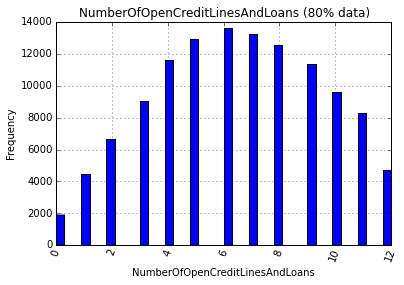

In [26]:
# 20 percent of the data are ignored -> only 80 percent data will be plotted
percentile_80 = NumberOfOpenCreditLinesAndLoans_sorted.size * 0.2
plt.hist(NumberOfOpenCreditLinesAndLoans_sorted[:-percentile_80], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfOpenCreditLinesAndLoans")
plt.ylabel("Frequency")
plt.title("NumberOfOpenCreditLinesAndLoans (80% data)")
plt.grid()

##8.NumberOfTimes90DaysLate

In [27]:
NumberOfTimes90DaysLate = data['NumberOfTimes90DaysLate']
print NumberOfTimes90DaysLate.head(10)

print type(NumberOfTimes90DaysLate)



1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: NumberOfTimes90DaysLate, dtype: int64
<class 'pandas.core.series.Series'>


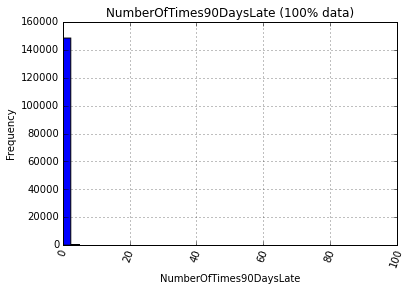

In [28]:
plt.hist(np.array(NumberOfTimes90DaysLate), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTimes90DaysLate")
plt.ylabel("Frequency")
plt.title("NumberOfTimes90DaysLate (100% data)")
plt.grid()


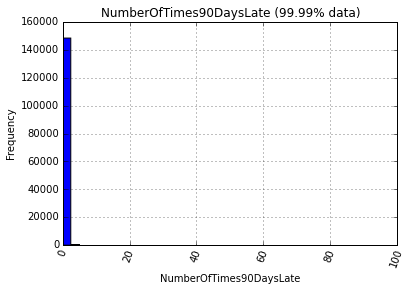

In [29]:
## Remove outliers
# sort the data
NumberOfTimes90DaysLate_sorted = np.sort(np.array(NumberOfTimes90DaysLate))

# 1 percent of the data are ignored -> only 99 percent data will be plotted
percentile_99_99 = NumberOfTimes90DaysLate_sorted.size * 0.0001
plt.hist(NumberOfTimes90DaysLate_sorted[:-percentile_99_99], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTimes90DaysLate")
plt.ylabel("Frequency")
plt.title("NumberOfTimes90DaysLate (99.99% data)")
plt.grid()

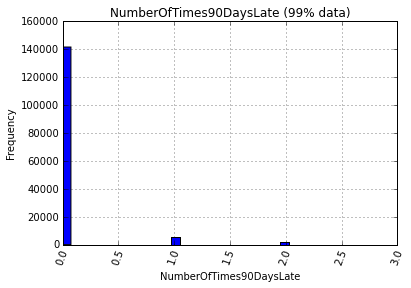

In [30]:
# 5 percent of the data are ignored -> only 95 percent data will be plotted
percentile_99 = NumberOfTimes90DaysLate_sorted.size * 0.01
plt.hist(NumberOfTimes90DaysLate_sorted[:-percentile_99], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTimes90DaysLate")
plt.ylabel("Frequency")
plt.title("NumberOfTimes90DaysLate (99% data)")
plt.grid()

##9.NumberRealEstateLoansOrLines

In [31]:
NumberRealEstateLoansOrLines = data['NumberRealEstateLoansOrLines']
print NumberRealEstateLoansOrLines.head(10)

print type(NumberRealEstateLoansOrLines)



1     6
2     0
3     0
4     0
5     1
6     1
7     3
8     0
9     0
10    4
Name: NumberRealEstateLoansOrLines, dtype: int64
<class 'pandas.core.series.Series'>


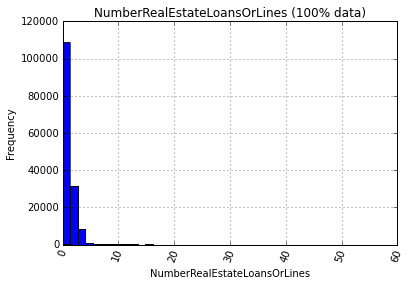

In [32]:
plt.hist(np.array(NumberRealEstateLoansOrLines), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberRealEstateLoansOrLines")
plt.ylabel("Frequency")
plt.title("NumberRealEstateLoansOrLines (100% data)")
plt.grid()


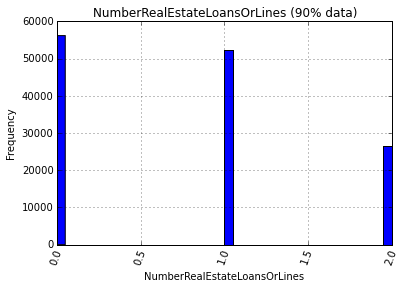

In [33]:
## Remove outliers
# sort the data
NumberRealEstateLoansOrLines_sorted = np.sort(np.array(NumberRealEstateLoansOrLines))

# 1 percent of the data are ignored -> only 99 percent data will be plotted
percentile_90 = NumberRealEstateLoansOrLines_sorted.size * 0.1
plt.hist(NumberRealEstateLoansOrLines_sorted[:-percentile_90], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberRealEstateLoansOrLines")
plt.ylabel("Frequency")
plt.title("NumberRealEstateLoansOrLines (90% data)")
plt.grid()

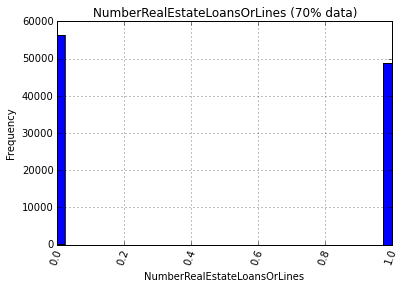

In [34]:
percentile_70 = NumberRealEstateLoansOrLines_sorted.size * 0.3
plt.hist(NumberRealEstateLoansOrLines_sorted[:-percentile_70], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberRealEstateLoansOrLines")
plt.ylabel("Frequency")
plt.title("NumberRealEstateLoansOrLines (70% data)")
plt.grid()

##10.NumberOfTime60-89DaysPastDueNotWorse

In [35]:
NumberOfTime60_89DaysPastDueNotWorse = data['NumberOfTime60-89DaysPastDueNotWorse']
print NumberOfTime60_89DaysPastDueNotWorse.head(10)

print type(NumberOfTime60_89DaysPastDueNotWorse)



1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
<class 'pandas.core.series.Series'>


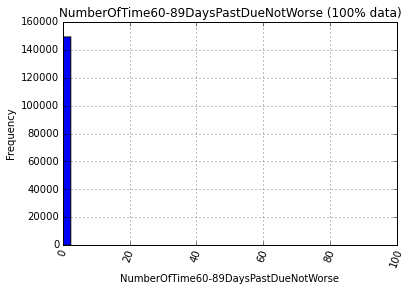

In [36]:
plt.hist(np.array(NumberOfTime60_89DaysPastDueNotWorse), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTime60-89DaysPastDueNotWorse")
plt.ylabel("Frequency")
plt.title("NumberOfTime60-89DaysPastDueNotWorse (100% data)")
plt.grid()


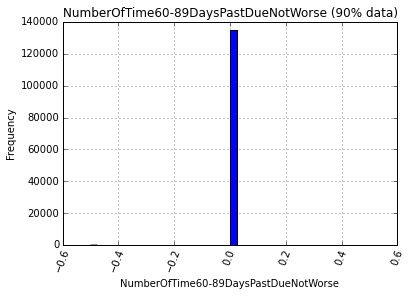

In [37]:
## Remove outliers
# sort the data
NumberOfTime60_89DaysPastDueNotWorse_sorted = np.sort(np.array(NumberOfTime60_89DaysPastDueNotWorse))

# 1 percent of the data are ignored -> only 99 percent data will be plotted
percentile_90= NumberOfTime60_89DaysPastDueNotWorse_sorted.size * 0.1
plt.hist(NumberOfTime60_89DaysPastDueNotWorse_sorted[:-percentile_90], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTime60-89DaysPastDueNotWorse")
plt.ylabel("Frequency")
plt.title("NumberOfTime60-89DaysPastDueNotWorse (90% data)")
plt.grid()

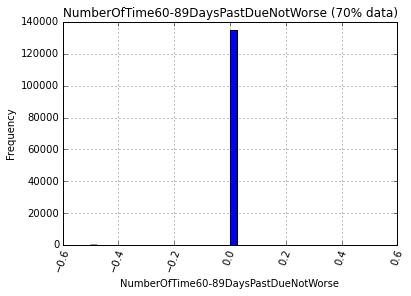

In [38]:
percentile_70= NumberOfTime60_89DaysPastDueNotWorse_sorted.size * 0.3
plt.hist(NumberOfTime60_89DaysPastDueNotWorse_sorted[:-percentile_90], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfTime60-89DaysPastDueNotWorse")
plt.ylabel("Frequency")
plt.title("NumberOfTime60-89DaysPastDueNotWorse (70% data)")
plt.grid()

##11.NumberOfDependents

In [39]:
# examine column by column
# 2. RevolvingUtilizationOfUnsecuredLines
NumberOfDependents = data['NumberOfDependents']
print NumberOfDependents.head(10)

NumberOfDependents_without_NaN = NumberOfDependents[NumberOfDependents > 0]
print type(NumberOfDependents_without_NaN)


1      2
2      1
3      0
4      0
5      0
6      1
7      0
8      0
9    NaN
10     2
Name: NumberOfDependents, dtype: float64
<class 'pandas.core.series.Series'>


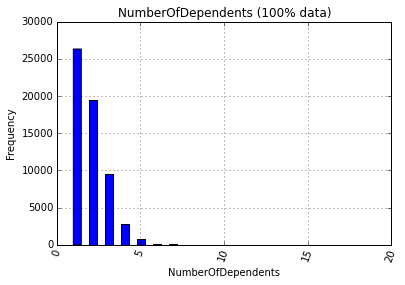

In [40]:
plt.hist(np.array(NumberOfDependents_without_NaN), 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfDependents")
plt.ylabel("Frequency")
plt.title("NumberOfDependents (100% data)")
plt.grid()


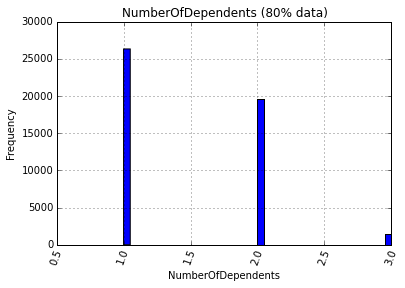

In [41]:
## Remove outliers
# sort the data
NumberOfDependents_sorted = np.sort(np.array(NumberOfDependents_without_NaN))

# 20 percent of the data are ignored -> only 80 percent data will be plotted
percentile_80 = NumberOfDependents_sorted.size * 0.2
plt.hist(NumberOfDependents_sorted[:-percentile_80], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfDependents")
plt.ylabel("Frequency")
plt.title("NumberOfDependents (80% data)")
plt.grid()

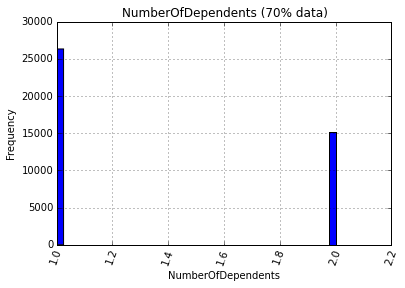

In [42]:
# 30 percent of the data are ignored -> only 70 percent data will be plotted
percentile_70 = NumberOfDependents_sorted.size * 0.3
plt.hist(NumberOfDependents_sorted[:-percentile_70], 40)
plt.xticks(rotation=70)    # x values tilted
plt.xlabel("NumberOfDependents")
plt.ylabel("Frequency")
plt.title("NumberOfDependents (70% data)")
plt.grid()

#II. Two Features: Scatter Plot & Separated Histograms
    * Scatter Plot: 
        Input feature - Target feature (SeriousDlqin2yrs) relationships
    
    * Separated Histograms:
        - Individual feature distribution when SeriousDlqin2yrs == 1
        - Individual feature distribution when SeriousDlqin2yrs == 0

In [4]:
# Make a dictionary of single columns
singleColDict = {}
for i in data.columns:
    singleColDict[i] = np.nan_to_num(data[i])

In [5]:
singleColDict

{u'DebtRatio': 1            0.802982
 2            0.121876
 3            0.085113
 4            0.036050
 5            0.024926
 6            0.375607
 7         5710.000000
 8            0.209940
 9           46.000000
 10           0.606291
 11           0.309476
 12           0.531529
 13           0.298354
 14           0.382965
 15         477.000000
 16           0.209892
 17        2058.000000
 18           0.188274
 19           0.527888
 20           0.065868
 21           0.430046
 22           0.475841
 23           0.241104
 24           0.085512
 25           0.241622
 26           1.595253
 27           0.097672
 28           0.042383
 29           0.011761
 30           0.436103
              ...     
 149971       0.253855
 149972       0.013997
 149973       0.008638
 149974       0.494819
 149975       0.603479
 149976    2716.000000
 149977      60.000000
 149978     349.000000
 149979       0.259496
 149980       0.057235
 149981       0.254976
 149982       0.1217

In [21]:
def scatterPlot(singleColDict, attributeName):
    plt.figure()
    plt.scatter(singleColDict[attributeName], singleColDict["SeriousDlqin2yrs"])
    plt.xticks(rotation=70)    # x values tilted
    plt.xlabel("%s" % attributeName)
    plt.ylabel("Serious Delinquency in 2 years (no = 0, yes = 1)")
    plt.title("%s - Serious Deliquency in 2 years relationship" % attributeName)
    plt.grid()

def separatedHistogram(singleColDict, attributeName):
    '''
    attributeName: str
        prints histogram of 1 label data % 0 label data
    returns: None'''
    
    data1 = singleColDict[attributeName][singleColDict["SeriousDlqin2yrs"] == 1]
    plt.figure()
    plt.hist(np.array(data1))
    plt.xticks(rotation=70)   
    plt.xlabel("%s" % attributeName)
    plt.ylabel("Frequency")
    plt.title("%s Distribution (SeriousDlqin2yrs = 1)" % attributeName)
    plt.grid()

    data0 = singleColDict[attributeName][singleColDict["SeriousDlqin2yrs"] == 0]
    plt.figure()
    plt.hist(np.array(data0))
    plt.xticks(rotation=70)   
    plt.xlabel("%s" % attributeName)
    plt.ylabel("Frequency")
    plt.title("%s Distribution (SeriousDlqin2yrs = 0)" % attributeName)
    plt.grid()


<<SeriousDlqin2yrs>>
min: 0
mean: 0.06684
max: 1

<<RevolvingUtilizationOfUnsecuredLines>>
min: 0.0
mean: 6.04843805467
max: 50708.0

<<age>>
min: 0
mean: 52.2952066667
max: 109

<<NumberOfTime30-59DaysPastDueNotWorse>>
min: 0
mean: 0.421033333333
max: 98

<<DebtRatio>>
min: 0.0
mean: 353.005075764
max: 329664.0

<<MonthlyIncome>>
min: 0.0
mean: 5348.13892
max: 3008750.0

<<NumberOfOpenCreditLinesAndLoans>>
min: 0
mean: 8.45276
max: 58

<<NumberOfTimes90DaysLate>>
min: 0
mean: 0.265973333333
max: 98

<<NumberRealEstateLoansOrLines>>
min: 0
mean: 1.01824
max: 54

<<NumberOfTime60-89DaysPastDueNotWorse>>
min: 0
mean: 0.240386666667
max: 98

<<NumberOfDependents>>
min: 0.0
mean: 0.737413333333
max: 20.0



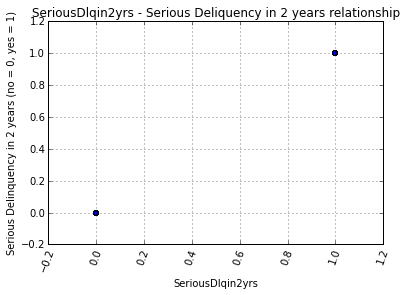

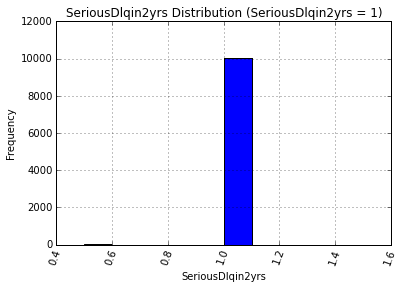

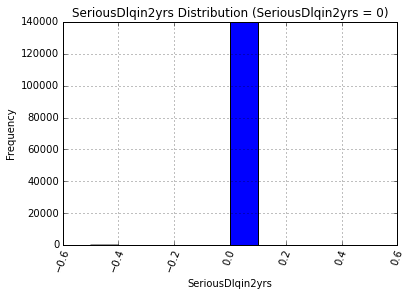

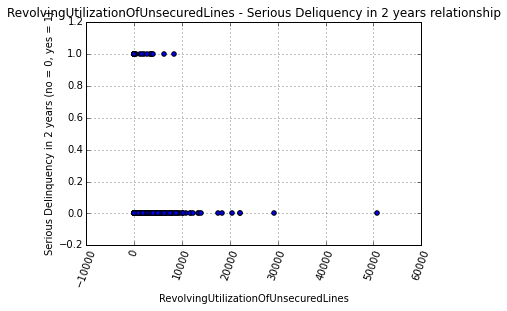

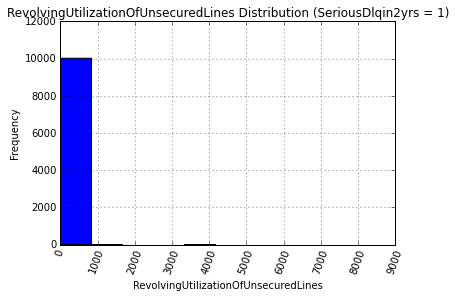

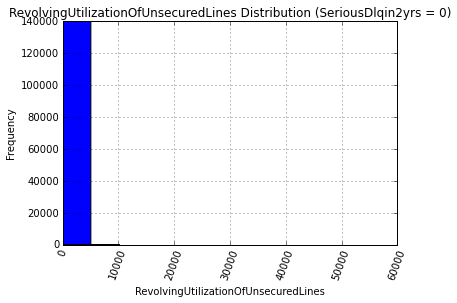

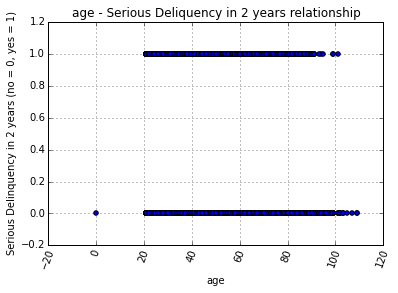

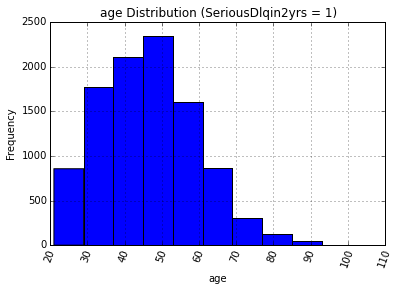

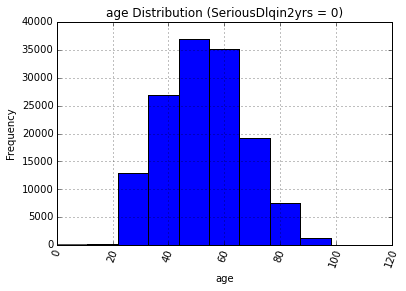

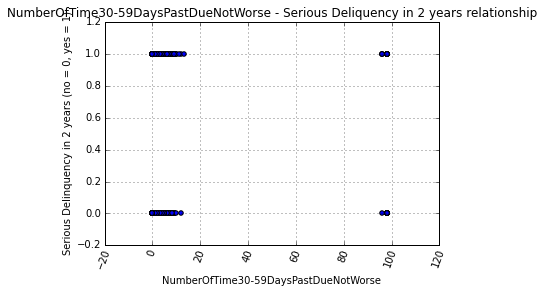

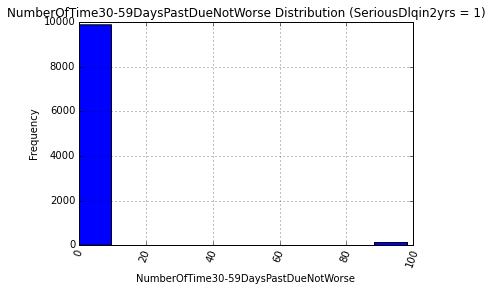

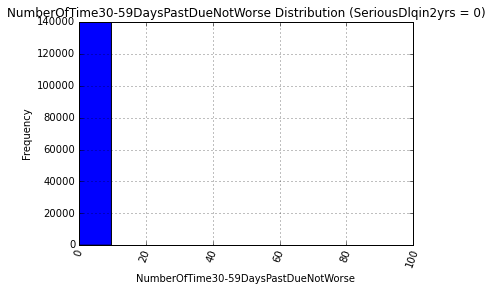

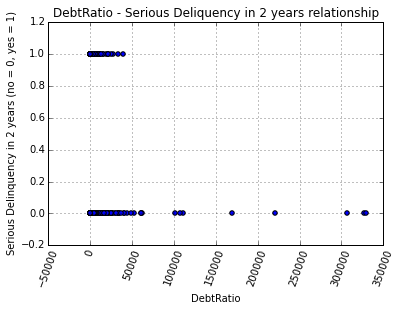

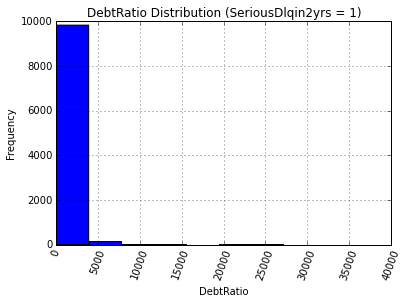

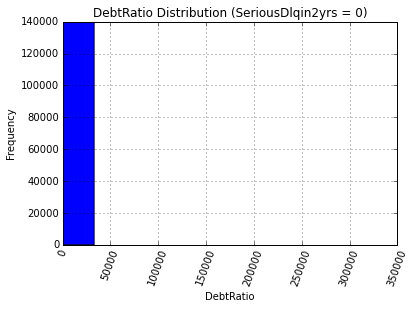

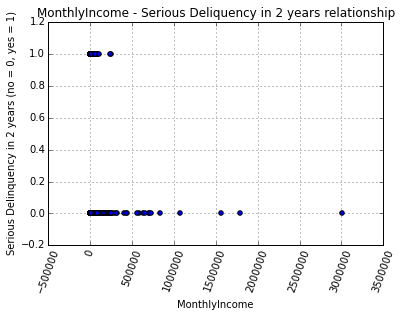

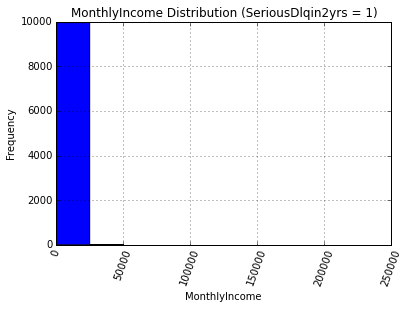

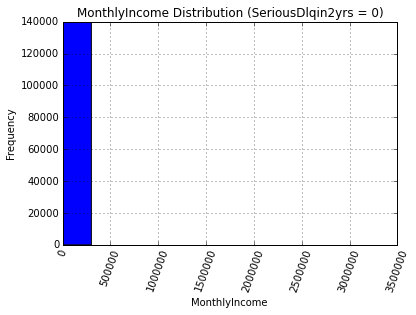

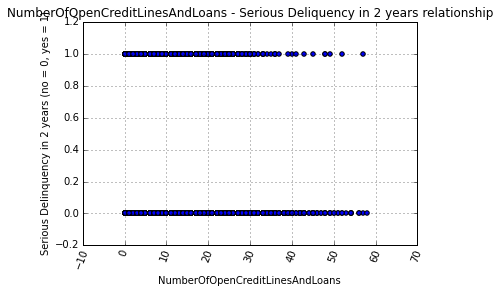

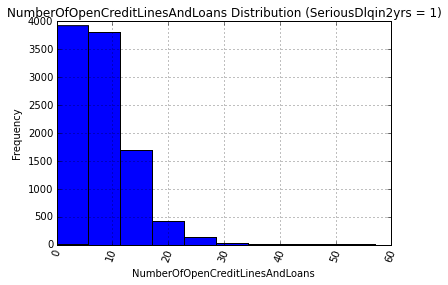

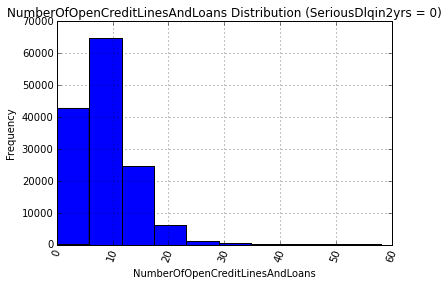

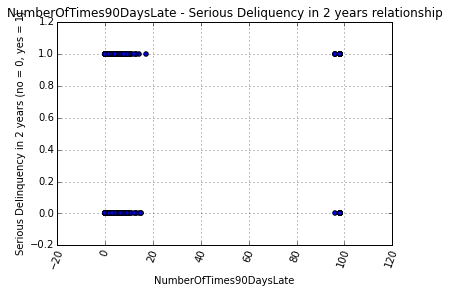

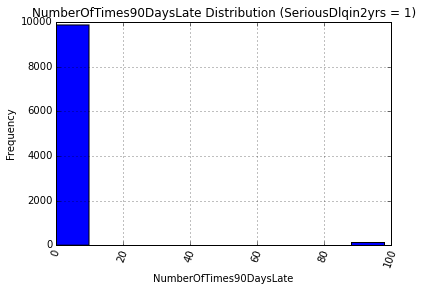

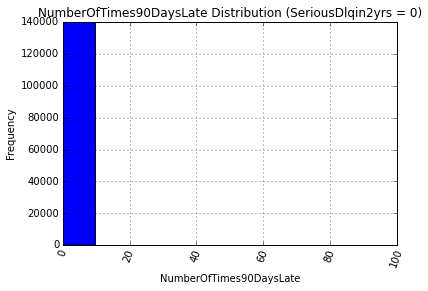

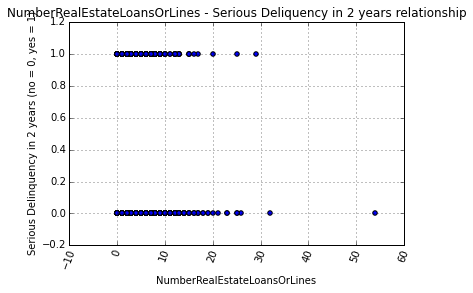

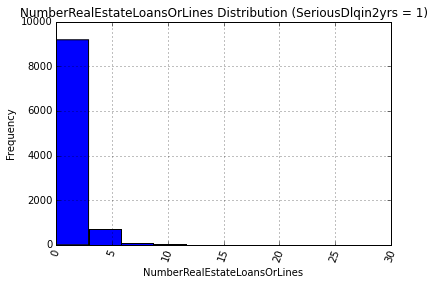

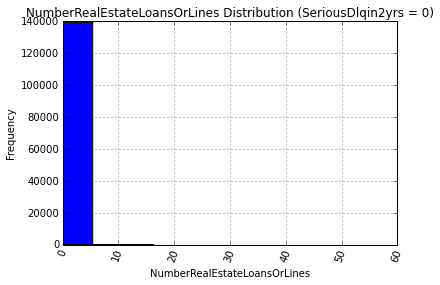

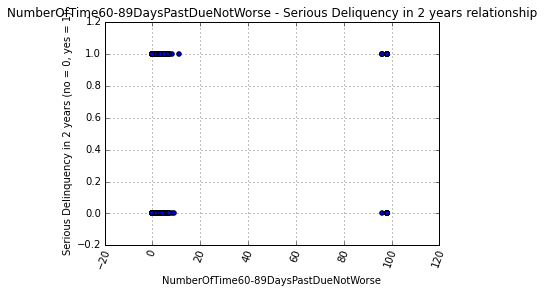

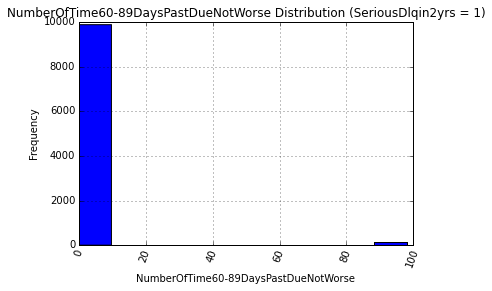

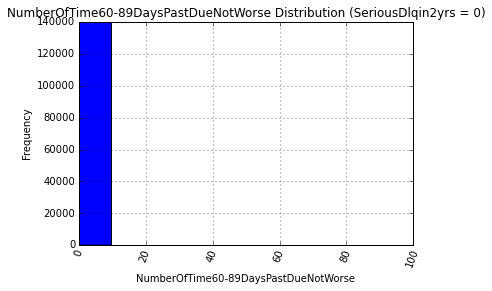

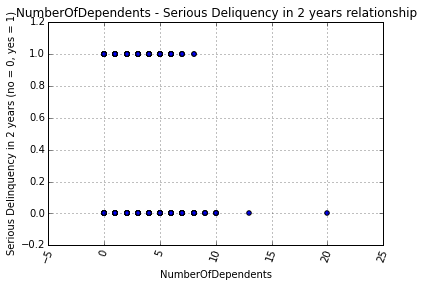

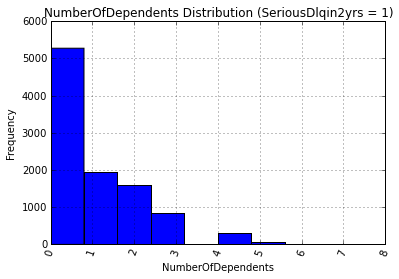

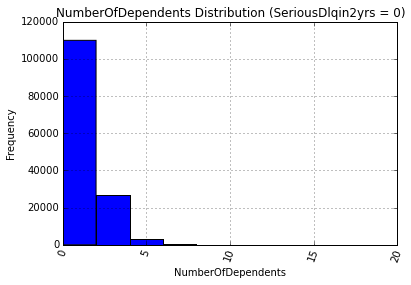

In [25]:
for i in data.columns:
    column = singleColDict[i]
    print "<<%s>>" % i
    print "min:", min(column)
    print "mean:", np.mean(column)
    print "max:", max(column)
    print
    scatterPlot(singleColDict, i)
    separatedHistogram(singleColDict, i)